In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib notebook
import locale
from matplotlib.ticker import ScalarFormatter

In [141]:
locale.setlocale(category=locale.LC_ALL, locale="Russian")

'Russian_Russia.1251'

In [142]:
file = 'data/spb-rentals-2020-feb'
df = pd.read_csv(file + '.csv', encoding='utf-16', delimiter='\t')
df.head()

,ID,Дата,Тип жилья,Тип дома,Год постройки,Этаж,Адрес,X,Y,Станция метро,"Расстояние до метро, м","Общая площадь, м","Площадь кухни, м","Жилая площадь, м","Аренда, руб./мес.","Ком. платежи, руб./мес.","Комиссия, %","Комиссия, руб.","Общий платеж, руб./мес",Описание
0,373307,04.02.2021,студия,Кирпичный,1975 г.п.,6/16 этаж,"Наличная ул., 51",59.951063,30.234309,Приморская,280,20.0,NaN,NaN,18000,2500.0,50,9000.0,20500,"\r\n Просторна, тёплая квартира..."
1,373306,04.02.2021,студия,Кирпичный,2011 г.п.,16/17 этаж,"Ленинский пр., 84к2",59.858804,30.199274,Ленинский пр.,4010,30.0,2.0,NaN,19000,2000.0,50,9500.0,21000,\r\n Отличная квартира-студия н...
2,373288,04.02.2021,студия,Кирпичный,,2/6 этаж,"Подольская ул., 44",59.913083,30.328014,Технологический и-т,620,16.0,NaN,NaN,20000,3000.0,15,3000.0,23000,\r\n Сдам на длительный срок кв...
3,373273,04.02.2021,студия,Кирп.Монолит,,13/24 этаж,"Пулковская ул., 6к2",59.839669,30.350828,Звездная,740,25.0,NaN,NaN,18000,2500.0,60,10800.0,20500,\r\n Сдается квартира-студия в ...
4,373268,04.02.2021,студия,Монолит,,11/14 этаж,"Ковалевская ул., 26к1",59.979444,30.510961,Ладожская,6580,26.0,6.0,NaN,16000,3500.0,60,9600.0,19500,\r\n Сдам квартиру студию в хор...


In [9]:
df['Аренда, руб./мес.'].groupby(df['Тип дома']).mean()

Тип дома
1.090.1 серия             35000.000000
121(Гатчинская)           22714.285714
137 серия                 22247.142857
504 серия                 21941.176471
504Д серия                20950.000000
600.11 серия              20392.857143
602 серия                 26000.000000
606 серия                 20770.000000
Бесшовная технология      32200.000000
Блочный                   25480.769231
Брежневка                 22714.285714
Индивидуальный проект     44164.634146
Кирп.Монолит              34873.384030
Кирпичный                 38247.067496
Корабль                   20386.363636
Монолит                   38942.953020
Монолитный Панельный      22442.105263
Панельный                 22863.849765
Реконструкция            145000.000000
Сталинский                40970.588235
Старый фонд               53220.000000
Старый фонд без КР        27000.000000
Старый фонд с КР          62109.375000
Хрущевка                  21666.666667
Name: Аренда, руб./мес., dtype: float64

In [10]:
df['Аренда, руб./мес.'].groupby(df['Тип жилья']).mean()

Тип жилья
1-комн. квартира     23402.373247
2-комн. квартира     34158.058925
3-комн. квартира     56655.507874
4-комн. квартира    154439.024390
5-комн. квартира    196461.538462
6-комн. квартира    157000.000000
студия               22950.724638
Name: Аренда, руб./мес., dtype: float64

In [143]:
def group_by_type(flat_type):
    grouped = df[df['Тип жилья'] == flat_type][['Аренда, руб./мес.', 'Тип дома']]
    grouped = grouped['Аренда, руб./мес.'].groupby(grouped['Тип дома']).mean()
    grouped = pd.DataFrame(grouped)
    grouped = grouped.sort_values(by='Тип дома')
    grouped['Аренда, руб./мес.'] = grouped['Аренда, руб./мес.'].astype(int) 
    grouped = grouped.rename({'Тип дома':'Тип дома', 'Аренда, руб./мес.': flat_type}, axis='columns')
    return grouped

In [144]:
group_by_type('2-комн. квартира')

,2-комн. квартира
Тип дома,
1.090.1 серия,35000
121(Гатчинская),30000
137 серия,25188
504 серия,21000
504Д серия,21300
600.11 серия,21000
602 серия,21500
606 серия,28500
Бесшовная технология,55000


In [159]:
df_m = pd.concat([group_by_type('студия'), group_by_type('1-комн. квартира'), 
                  group_by_type('2-комн. квартира'), group_by_type('3-комн. квартира')], 
                 axis=1, ignore_index=False, sort=False, join='outer')
df_m

,студия,1-комн. квартира,2-комн. квартира,3-комн. квартира
Блочный,20000.0,21950.0,25950.0,31900.0
Индивидуальный проект,26428.0,29743.0,36472.0,114375.0
Кирп.Монолит,20971.0,25304.0,46633.0,68323.0
Кирпичный,22671.0,24022.0,36451.0,59856.0
Монолит,22837.0,24888.0,44108.0,79565.0
Монолитный Панельный,19250.0,20114.0,24238.0,34076.0
Панельный,17666.0,18815.0,24818.0,30695.0
Старый фонд,28777.0,28875.0,36647.0,68300.0
Старый фонд с КР,43333.0,30076.0,48000.0,69294.0
121(Гатчинская),NaN,21500.0,30000.0,NaN


In [160]:
df_m.describe()

,студия,1-комн. квартира,2-комн. квартира,3-комн. квартира
count,9.000000,21.000000,23.00000,20.000000
mean,24659.222222,22595.095238,31019.00000,50112.050000
std,7822.598222,4860.139400,10086.82471,32762.733561
min,17666.000000,16450.000000,21000.00000,23000.000000
25%,20000.000000,18815.000000,22495.00000,30000.000000
50%,22671.000000,21500.000000,27000.00000,33250.000000
75%,26428.000000,25304.000000,36559.50000,68305.750000
max,43333.000000,33500.000000,55000.00000,145000.000000


In [185]:
facecolor = '#242426'
font_color = '#ddd'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
color_1 = '#cdf151'

<IPython.core.display.Javascript object>


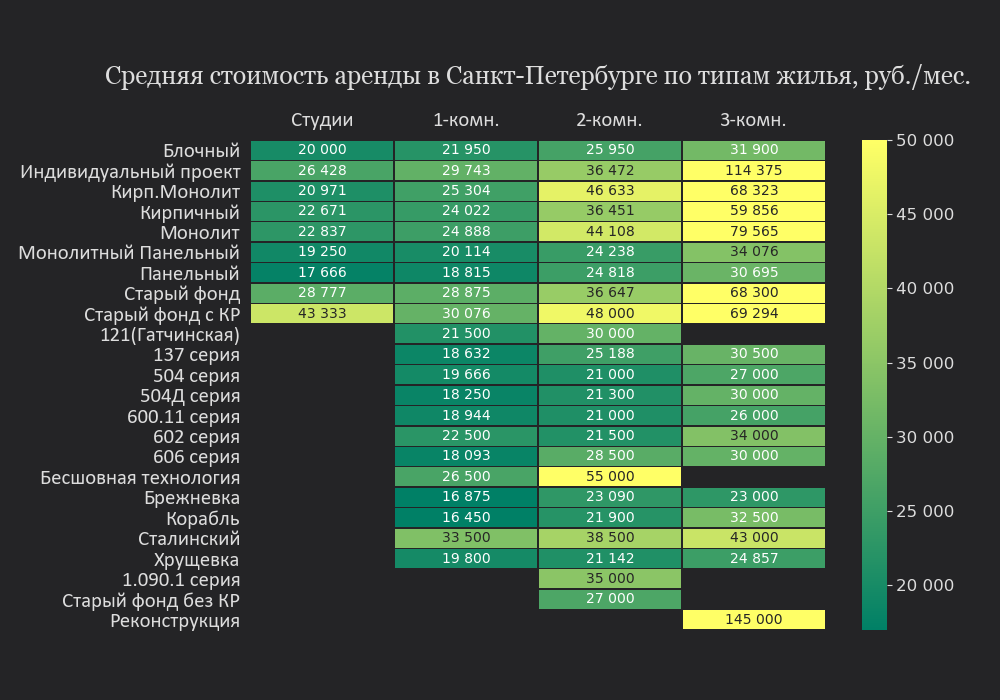

In [216]:
fig, ax = plt.subplots(figsize=(10, 7), facecolor=facecolor) 
        
g = sns.heatmap(df_m, 
            cmap='summer', 
            vmin=17000, 
            vmax=50000, 
            linewidth=0.3, 
            cbar_kws={'shrink': 1}, 
            annot=True, 
            fmt='n',
            linecolor=facecolor
           )
g.set_facecolor(facecolor)

xticks_labels = ['Студии', '1-комн.', '2-комн.', '3-комн.']
plt.xticks(np.arange(4) + .5, labels=xticks_labels)
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)

plt.xlabel('')
plt.ylabel('')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=15, color=font_color, **hfont)

title = 'Средняя стоимость аренды в Санкт-Петербурге по типам жилья, руб./мес.'
plt.title(title, fontsize=18, pad=20, color=font_color, **csfont)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12, labelcolor=font_color, color=font_color)
cbar.set_ticks([20000, 25000, 30000, 35000, 40000, 45000, 50000])
cbar.set_ticklabels(['20 000', '25 000', '30 000', '35 000', '40 000', '45 000', '50 000'])

plt.subplots_adjust(wspace=0, top=0.8, bottom=0.1, left=0.25, right=0.97)

In [217]:
filename = 'images/house-type'
plt.savefig(filename+'.png', facecolor=facecolor)